# Homework 2 

### By: Samantha Cohen 
### Uniqname: samcoh

## Imports: 

In [1]:
import numpy as np
import pandas as pd

from bokeh.layouts import layout
from bokeh.layouts import widgetbox

from bokeh.embed import file_html

from bokeh.io import show
from bokeh.io import output_notebook

from bokeh.models import Text
from bokeh.models import Plot
from bokeh.models import Title
from bokeh.models import Slider
from bokeh.models import Circle
from bokeh.models import Range1d
from bokeh.models import CustomJS
from bokeh.models import HoverTool
from bokeh.models import LinearAxis
from bokeh.models import ColumnDataSource
from bokeh.models import SingleIntervalTicker
from bokeh.plotting import figure
#from bokeh.palettes import Spectral6
from bokeh.palettes import plasma

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 


## 1. Question Forumulation (6 points)

Being able to formulate good questions is an important aspect of exploratory data analysis.  This part
of the homework provides an opportunity for you to practice developing this skill.

Generate three (3) authentic exploratory questions about the data, similar in nature to what was asked in the previous homework assignment's questions 5, 6, and the Bonus Question.  When contemplating which questions to pose, keep in mind that you should generate questions that can be answered using visualizations of the data.  Questions should be chosen to allow you to demonstrate your ability to both manipulate data and visualize it.  Selecting overly simplistic questions (e.g. "What is the median age of female swimmers") will not earn full points.

Questions should start with "I wonder...".  For example:  "I wonder how the number of different events in the Summer Olympics has changed over time".

We suggest working on question formulation in teams during class and asking peers and the teaching team for feedback.  You should also feel free to circle back after you work on your visualizations to rephrase or reframe your questions.


## 2. Seaborn and Bokeh Visualizations (20 points)
Create one or more Seaborn-based **and** one or more Bokeh-based visualizations that can provide visual answers to the questions you posed in the previous section.  A total of *at least* four (4) visualizations should be used, including one from each of Seaborn and Bokeh. If you create more than four visualizations, the best four will be
counted.  The following rubric will be used for each visualization:

* 5 points: Excellent visualization that goes beyond the basics covered in class.  Clear understanding of the visualization toolkit's functionality, typically learned from studying the documentation and/or examples from other sources.
* 4 points: Good visualization that uses basic charting and plotting functions as covered in class.
* 3 points: Acceptable visualization with some errors or omissions.  
* 2 points: Perfunctory attempt at creating a visualization.






In [2]:
output_notebook()

Loading BokehJS ...

# Load Dataset 

In [3]:
olympic_games = pd.read_csv('https://bit.ly/2lUIi5P')
olympic_games =olympic_games.set_index('ID') #made ID the index 

##### Explanation: 
I used the read_csv method in pandas to read in the data from the link provided: https://bit.ly/2lUIi5P . I then made the column ID the index in the DataFrame olympic_games  by using the method set_index. 

# a) How does athlete participation in the Winter Olympic games vary over time? 

In other words, for each year in the dataset count the number of athletes that participated in the winter olympic games. It will be interesting to see how participation in the Winter Olympic Games has varied over time. 

#### 1) Filter the data to only show winter olympic games 

In [4]:
olympic_games_winter =olympic_games[olympic_games["Season"] == "Winter"]

#### 2) Find the Number of athletes that have participated in the Winter Olympic games each year 

In [5]:
year_and_number_of_athletes= olympic_games_winter \
    .groupby(["Year"])["Name"] \
    .count() \
    .reset_index(name = "Number_of_Athletes") \
    .sort_values("Year")

In [6]:
#year_and_number_of_athletes

#### 3) Create Visualizations 

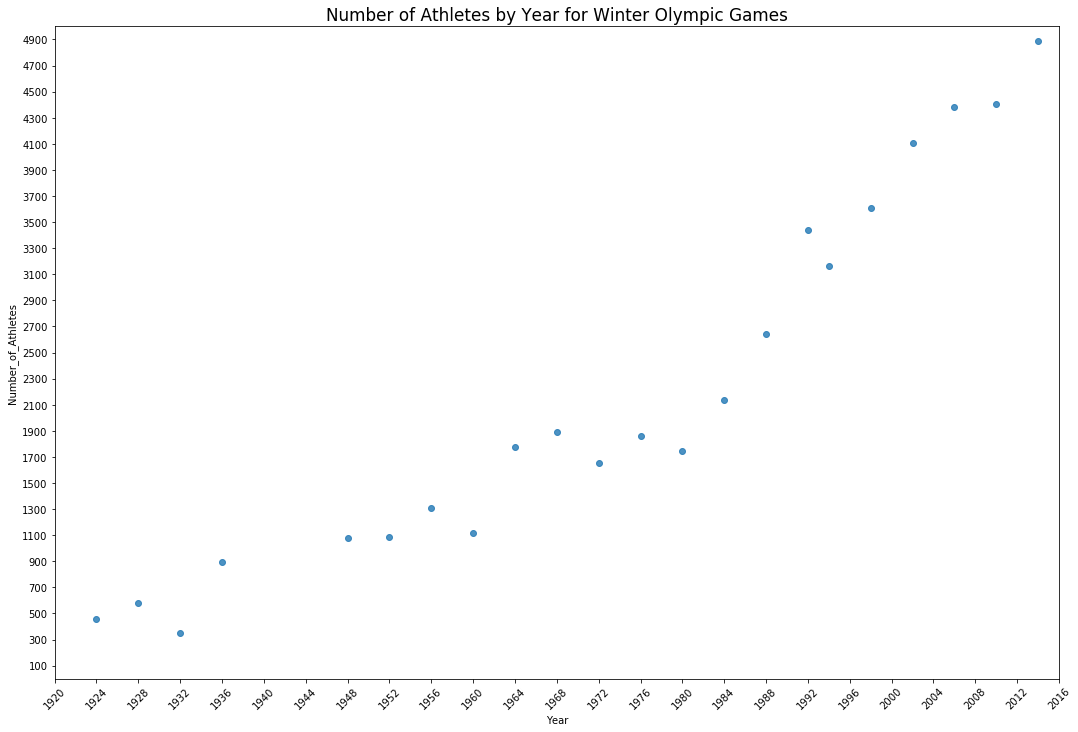

In [7]:

fig, ax = plt.subplots()
sns.set(font_scale=1.4)
plot = sns.regplot(x="Year", y="Number_of_Athletes", marker ="o",
                data = year_and_number_of_athletes, fit_reg =False) \
    .set_title("Number of Athletes by Year for Winter Olympic Games")

#controling range of x-axis 
ax.set_xlim(1924,2016)
ax.set_xticks(range(1920,2018,4))

#controlling range of y-axis 
ax.set_ylim(0,5000)
ax.set_yticks(range(100,5100,200))

#controling size  of fig  
fig.set_size_inches(18,12)

#using matplotlib to  control the rotation of the x-axis ticks 
plt.xticks(rotation=45) 

plt.show()


### Explanation: 
The above visualization uses the regpot, linear regression plot offered by seaborn, and matplotlib functionality to plot the data. I chose  to use this visualization because it demonstrates well the relationship between number of athletes and year(time). I set the x-axis range to show values every 4 years starting in 1920 up until 2016. I did this because typically the Olympic Games happen every 4 years. I also saw that the Olympic Winter games data began in 1924. After doing some research, before 1924 there was no winter olympic games so this explains the lack of Olympic Winter games data until 1924. 


*Findings*: 

You can see that there is a gap on the x-axis between 1940 and 1944. This at first seemed weird to me because it appears that the every 4 years since 1924 the Olympic Games were held. After doing some reasearch, I found out the Olympic Games were cancelled due to World War II (https://en.wikipedia.org/wiki/Winter_Olympic_Games). As well, in the year 1986 the Olympic committee decided to hold events every 2 Years (switching between Summer and Winter Olympic Games). The Winter games started their own 4 year cycle beginning in 1994. That is why the data shows that there was an olympic games in 1994, 2 years after the 1992 Winter olympic games. After 1994, the olympic have been held constantly every 4 years. 

As well, I found that participation in the winter Olympic Games has overall increased since the start of the Winter Olympics in 1924. Although, it is important to note that participation among Athletes does not necessarily increase every Olympic Year. For example, in 1956 their was a higher participation among athletes in the Olympics than in the year in 1960. 


*Sources*: 


In order to figure out how to rescale the x axis and change the font size I did some research online. Below are the links I used to help me. 


- source to help with x-axis range: https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python#targetText=By%20default%20the%20seaborn%20displaces,5%20to%2035%20in%20distplots.

- Source for relplot changing the font size: 
https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid



Text(0.5, 1.0, 'Number of Athletes by Year in the Winter Olympic Games')

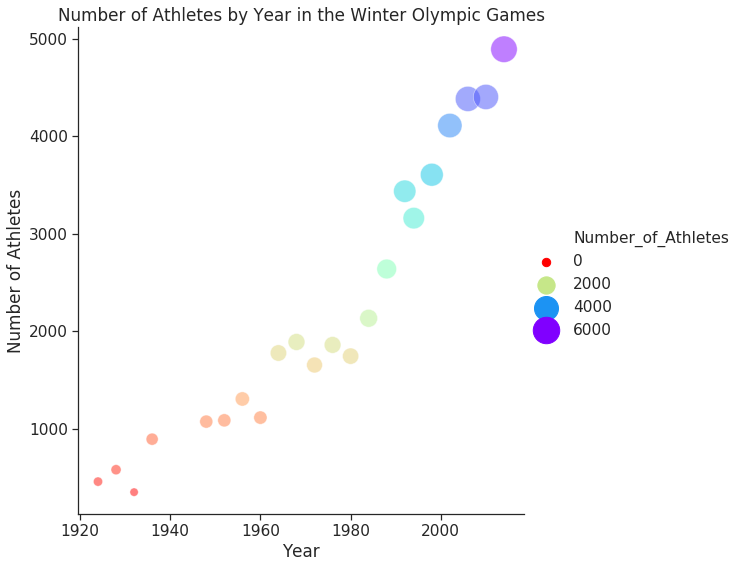

In [8]:
sns.set_style("ticks")
with sns.plotting_context(font_scale=25):
    plot = sns.relplot(x="Year",y="Number_of_Athletes", size="Number_of_Athletes", hue = "Number_of_Athletes",
            sizes=(70, 700), alpha=.5, palette = "rainbow_r",
            height=8, legend = "brief", data=year_and_number_of_athletes).set_axis_labels("Year", "Number of Athletes")


# rc={"font.size":10,"axes.labelsize":10}
#plot.set_size_inches(18,10)
#alpha: shade 

#replot is a facetgrid in Seaborn 
plt.title('Number of Athletes by Year in the Winter Olympic Games')#https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot


### Explanation: 

Above I used matplotlib and seaborn to create a relplot, which is a Figure-level interface for drawing relational plots onto a FacetGrid. I set the legend to be equal to brief so the audience can see the color bins and sizes more clearly. If the number of Olympic participants is small the color will be red. A shift in shade, for example going from red to orange, and larger bubble size, indicates an increase in participation in the Winter Olympics. This plot makes it easy to see that there has been an increase in participation in the Winter Olympic games overtime. The colors of the bubbles help the audience see the years that have higher or lower participation. Without the colors, the slight changes in bubble sizes might not be as noticable to the viewer. 

The colors and sizes of the bubbles helps the audience to see the level of participation for each year of the olympics. If the color is red this indicates a low level of participation. The color purple indicates a high level of participation in the Olympics. The shade of the bubbles change to orange and increase in size in the late 1940s and late 1950s. In the late 1960s and  1980s you can see the bubble sizes increase and go from yellow to green. in the 1990s there is a shift in bubble color from green to blue. After the 2000s, the bubbles get even larger and shift to the color purple. This demonstrates clearly that there has been an overall increase in athletic participation in the Winter Olympics since the first Winter Olympics in 1924.  

*Sources*: 
I used outside sources to figure out how to change the font size of the graph:
- https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid



## b) I wonder if the median height of Male and Female basketball athletes  have changed over the years since the start of the data set. 


In [9]:
basketball_events = olympic_games[olympic_games["Sport"] == "Basketball"]["Event"].unique()
basketball_events

array(["Basketball Men's Basketball", "Basketball Women's Basketball"],
      dtype=object)

#### Explanation: 
Two events in basketball: "Basketball Men's Basketball", "Basketball Women's Basketball"

#### 1) Filter the data to only show where the Sport is equal to Basketball 

In [10]:
basketball_games = olympic_games[olympic_games["Sport"] == "Basketball"]

#### 2) For each Year get the Median and Average Height for both Male and Female Basketball athletes

- I got average as well because I thought it would be interesting data to include in my hovertool (for the visualization created below)

In [11]:
heights = basketball_games.groupby(["Year", "Sex"])["Height"].mean().reset_index(name = "Average_Height")
median_height = basketball_games.groupby(["Year","Sex"])["Height"].median().reset_index(name = "Median_Height")
heights = heights.merge(median_height, on = ["Year","Sex"], how = "inner")

#### 3) Create Visualization 

In [12]:

select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']
fig = figure(plot_height=400,
             plot_width=600,
             x_axis_label='Year',
             y_axis_label='Median_Height',
             title='Average Height Male versus Average Height Female for each Year of the Winter Olympics',
             tools=select_tools)


fig.circle('Year', 'Median_Height', 
           source=heights[heights["Sex"]=='F'],
           color='red',
           size=15,
           legend="Sex", 
           hover_color="black")
fig.circle('Year', 'Median_Height', 
           source=heights[heights["Sex"]=='M'],
           color='blue',
           size=15,
           legend="Sex",
           hover_color="black")
tooltips = [
            ('Average Height','@Average_Height'),
            ('Median_Height', '@Median_Height'),
            ('Year', '@Year'),
            ('Sex', '@Sex')
           ]

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips))
fig.legend.location = "top_left"

# Visualize
show(fig)


#### Explanation: 
I chose to use Bokeh circle plot to show how the median height has changed over the years in the Olympic Games. I did this because I wanted to use the hovertool so the audience could hover over a point and get the statistics for that year. If a point is hovered over on the graph you can see the Year, Sex, Average Height, and Median Height. This offers a lot of useful information that would be harder to provide using the other visualizations modules we have learned. 

I also wanted to plot both Male and Female on the same graph, using different colors, so the viewers could compare the changes in  height over time between the two groups. 

The median height for males and females has overall increased overtime, but it looks like both groups are dropping off slightly in median height. 

Also from reviewing this visualization I found that the Female Basketball event was not apart of the Olympics until 1976. The Men's Basketball event started in 1936. Also, the tallest median year for women's basketball team was in the year 2012.  The median height was 185. For men, the tallest median year was also 2012. The Median height for this year was 202.500. It is interesting that in 2012, for both men and women, this was the tallest median year. 

## c) I wonder if there is a most common sport where athletes participate in more than one event


- what sport do athletes compete in numerous events
What is the average for each Olympic event 

#### 1) Make a DataFrame with Sports and Athletes and the Number of Events they participated in 

In [13]:
athletes_sport_by_number_of_unique_events = olympic_games.groupby(["Name", "Sport"])["Event"] \
    .size() \
    .reset_index(name= "Number_of_Events") \
    .sort_values(by = "Number_of_Events", ascending = False)

#wait would this be wrong because double counting the same event over the years 

#### 2) Filter the DataFrame to get rid of athletes that have only participated in 1 event 

In [14]:
more_than_one =athletes_sport_by_number_of_unique_events[
    athletes_sport_by_number_of_unique_events["Number_of_Events"] > 1
]


#### 3) Create a DataFrame with Sports and the Number of Athletes that have participated in more than one event  
- counted the number of sports in the DataFrame more_than_one (this will tell me how many athletes for each sport competed in more than one event) 

In [15]:
final= more_than_one.groupby("Sport")["Sport"] \
    .count() \
    .sort_values(ascending = False) \
    .reset_index(name = "Number_of_Athletes")

#### 4) Visualization

In [16]:

select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']
p = figure(y_range = (0,10000), 
           x_range = (list(final["Sport"])),
           plot_height=650,
           plot_width=700,
           x_axis_label='Olympic Sport',
           y_axis_label='Number of Athletes who Have Competed in More than One Event',
           title='''The Number of Athletes that have Competed in More than One Event within an Olympic Sport''',
          )

p.vbar(x='Sport', top='Number_of_Athletes', width=1, 
       source = final, line_color= "black", hover_color="black")
p.xaxis.major_label_orientation = 1.5

tooltips = [
            ('Sport','@Sport'),
            ('Number of Athletes','@Number_of_Athletes')
           ]

# Add the HoverTool to the figure
p.add_tools(HoverTool(tooltips=tooltips))

show(p)

#### Explanation: 

I used Bokeh to plot this data because I wanted to use the hovertool. I also choose a bar graph because I thought it would do a good job of plotting categorical data on the x-axis, which in this case is Olympic Sports. 

From this visualization you can see that by far the Athletics Sport category at the olympics is the most common sport where athletes participate in more than one event. There are 9584 athletes who have participated in more than one event in this category. The second highest sport category is Swimming. 5540 athletes have participated in more than one Swimming event in the Olympics. The sport with the least amount of athletes who have participated in more than one event is Motorboating. The data shows that only 3 people have competed in more than one event in this sport category. 

## 3. Adapting the ```Gapminder``` Visualization (4 points)
Use some of the functionality from the Bokeh-based Gapminder visualization (detailed below) to create an interactive visualization that allows a user to explore the Olympics data set.  This section should also be driven by an overarching question that seeks to understand the relationship between two or more variables.  You must state this question as part of your answer to this section.

To create your interactive visualization, think about the number of variables that you want to present, along with the number of modalities that are available to you.  For example, in the Gapminder demo, there are three continuous variables (Children per woman, Life expectancy at birth, and Population) and two categorical variables (continent and year).  You don't need to use that many variables but you should be aware that you have quite a few options.

The number of points awarded for this section will be based on the degree to which your visualization allows the user (in this case, Chris and Minje) to explore your data while attempting to answer your question.  The following rubric will be used:

* 4 points: Excellent work that allows deep and thorough exploration of the data and that can reveal otherwise invisible features ("surprises").
* 2 points: Acceptable work that uses one advanced feature from the Gapminder visualization.
* 1 points: At least you tried!

You should create a new notebook for this homework.  The notebook
should conform to PEP-8 and "Elements of Style" guidelines.  The final notebook should represent your own original
work, although you are encouraged to work in groups while formulating questions and general approaches to
visualizations.

# For the top 10 Sports in the Summer Olympics with the most athlete participation, how does female participation compare to total participation overtime? 

- I am going to compare female participation to total participation in the olympic games throughout time for the 10 most participated sports in the Summer Olympics 

In [17]:
def process_data():
    #get 50 sports that have most participation in Olympics 
    #olympic_games = pd.read_csv('https://bit.ly/2lUIi5P')
    sports_popular = olympic_games[olympic_games["Season"] == "Summer"].groupby(["Sport"])["Name"] \
        .count() \
        .sort_values(ascending = False) \
        .reset_index(name = "Number_of_Participants") \
        .head(10)
    number_of_sports = len(sports_popular["Sport"].unique())
    #
    woman_df = olympic_games[(olympic_games["Season"] == "Summer")
                             & 
                             (olympic_games["Sex"] == "F") 
                             & 
                             (olympic_games["Sport"].isin(sports_popular["Sport"]))] \
        .groupby(["Year","Sport"])["Sex"] \
        .count() \
        .reset_index(name = "Women_Number_of_Athletes") \
        .sort_values(by = ["Year"]) \
        .fillna(0)

    total_participation_year = olympic_games[(olympic_games["Season"] == "Summer")
                                             & 
                                             (olympic_games["Sport"].isin(sports_popular["Sport"]))
                                             &
                                             (olympic_games["Year"].isin(woman_df["Year"]))] \
        .groupby(["Year", "Sport"])["Name"] \
        .count() \
        .reset_index(name = "Total_Number_of_Athletes") \
        .sort_values(by = ["Year"]) \
        .fillna(0)
   
  
    
    new_df = woman_df.merge(total_participation_year, on = ["Year", "Sport"])
    
    percent_women = new_df["Women_Number_of_Athletes"]/new_df["Total_Number_of_Athletes"]
    
    woman_df["Women_Number_of_Athletes"] = np.floor_divide(percent_women*100,1)#/100
    
    woman_df.columns = ["Year", "Sport", "Number_of_Athletes"]
    total_participation_year.columns = ["Year", "Sport", "Number_of_Athletes"]
    total_participation_year_df = total_participation_year.copy() 
    
    #set index to be year 

    woman = woman_df.pivot(columns = "Year", index = "Sport", values = "Number_of_Athletes").fillna(0)
    total_participation_year = total_participation_year.pivot(columns = "Year", values = "Number_of_Athletes", index = "Sport").fillna(0)

    columns = list(woman.columns)
    #years = list(range(int(columns[0]), int(columns[-1])))
    years = list(woman_df["Year"].unique())
    rename_dict = dict(zip(columns, years))
    #rename using rename dictionary (lines up data)
    woman = woman.rename(columns=rename_dict)
    #male = male_df.rename(columns=rename_dict)
    total_participation_year =  total_participation_year.rename(columns=rename_dict)
    sports_popular = sports_popular.rename(columns=rename_dict)
   
    scaling  = 200
  
    pop_size = np.sqrt(woman / np.pi) * 10  #dimension need to be square root of pop divided by pie (need to be circle)
    #take care of na, and set min size of bubbles to be 8 
    min_size = 8
    pop_size = pop_size.where(
                  pop_size >= min_size
                  ).fillna(min_size)
    
    # Use pandas categories and categorize & color the sports 
    sports_popular.Sport = sports_popular.Sport.astype('category')
    sports_list  = list(sports_popular.Sport.cat.categories)

    #assign colors to each row. Assign the colors per continent 
        #string column and turn it into category column
            #fixed set of strings that define categories--> can also be bins from cut command 
            #assign a color to each of categories 
    def get_color(r):
        return plasma(number_of_sports)[sports_list.index(r.Sport)]
        #return Spectral6[sports_list.index(r.Sport)]
        #inferno(number_of_sports)[sports_list.index(r.Sport)]
    
    #pulls out each color and assings it to each row 
    sports_popular['sport_color'] = sports_popular.apply(get_color, axis=1)
    sports_popular=sports_popular.set_index("Sport")

    return (woman, total_participation_year, pop_size, sports_popular, years, sports_list,
           number_of_sports)

                   
                    
                    

In [18]:
#here call process data and assign the results to the tuples 
#returning a bunch of dataframes and lists
(woman_df, total_participation_year_df,
pop_size_df, sports_popular_df, years, sports_popular,number_of_sports) = process_data()

sources = {}
sport_color = sports_popular_df['sport_color']
sport_color.name = 'sport_color'

# unstacked_woman =woman_df.unstack().reset_index(name = "Number_Of_Athletes").set_index("Sport")
# woman_athletes = np.array(unstacked_woman_no_null["Number_Of_Athletes"])
# unstacked_woman_no_null = unstacked_woman.dropna()

# new_bins = np.floor_divide(woman_athletes, 10)
# new_bins.max()

#create a large dataframe that puts all material together 

years = sorted(years) #have to sort years in order from smallest to largest 
for year in years:
    #fill nan with 0 
    woman = woman_df[year] #.fillna(0).astype('int')
    woman.name = 'woman'
    total = total_participation_year_df[year] #.fillna(0).astype('int')
    total.name = 'total'
    population = pop_size_df[year].astype('int')
    population.name = 'population'

    new_df = pd.concat(
                [woman, total, population, sport_color],
                axis=1, sort=False
    )
    sources['_' + str(year)] = ColumnDataSource(new_df)


In [19]:
#here get things lined up for javascript 
#keys need to start with non numerical value for JavaScript: so we put underscore before year here 
dict_of_sources = dict(zip(
                      [x for x in years],
                      ['_%s' % x for x in years])
                      )

js_source_array = str(dict_of_sources).replace("'", "")

In [20]:
#Here creating the definition of plot 
    #setting up axis 
#xdr  = Range1d(3,1208*1.05)
#x = Range1d(woman_df.min().min(), woman_df.max().max())
#y = Range1d(total_participation_year_df.min().min(),total_participation_year_df.max().max())

xdr  = Range1d(-0.1,100.1) #1.1
ydr  = Range1d(44, 2508*1.05)

plot = Plot(
    x_range= xdr, 
    y_range= ydr,
    plot_width=700,
    plot_height=550,
    outline_line_color=None,
    toolbar_location=None,
    min_border=40,
)
plot.title.text= "% Women Participation Compared to Total Participation For the Top 10 Summer Olympic Sports"





In [21]:
#consistant formats for dictionary 
#AXIS_FORMATS: set up things based on dictionary we created 
from math import pi
AXIS_FORMATS = dict(
    minor_tick_in=None,
    minor_tick_out=None,
    major_tick_in=None,
    major_label_text_font_size="10pt",
    major_label_text_font_style="normal",
    axis_label_text_font_size="10pt",

    axis_line_color='#AAAAAA',
    major_tick_line_color='#AAAAAA',
    major_label_text_color='#666666',

    major_tick_line_cap="round",
    axis_line_cap="round",
    axis_line_width=1,
    major_tick_line_width=1,
   
)

xaxis = LinearAxis(
    ticker     = SingleIntervalTicker(interval=10), #.1 
    axis_label = "Woman Participation (Percentage)",
    **AXIS_FORMATS
)
yaxis = LinearAxis(
    ticker     = SingleIntervalTicker(interval=100), #interval making bins 
    axis_label = "Total Paricipation",
    **AXIS_FORMATS
)   

plot.add_layout(xaxis, 'below')
plot.add_layout(yaxis, 'left')
plot.xaxis.major_label_orientation = pi/4
show(plot)

In [22]:
#annotate plot with text
#pull out year from data 
#will output first year in grey on white 
text_source = ColumnDataSource({'year': ['%s' % sorted(years)[0]]})
text        = Text(
                  x=0, y=500, text='year',
                  text_font_size='170pt',
                  text_color='#EEEEEE' #light grey
                  )
plot.add_glyph(text_source, text)
show(plot)

In [23]:
#woman_df[1968]
#text_source.data

In [24]:
# Add the circle
renderer_source = sources['_%s' % sorted(years)[0]]
circle_glyph    = Circle(
                    x='woman', 
                    y='total',
                    size='population', 
                    fill_alpha=0.8,
                    fill_color='sport_color',
                    line_color='#7c7e71',
                    line_width=0.5, line_alpha=0.5,
)
#circles are colored according to sport, whose size is proportionate to population of women participating 
circle_renderer = plot.add_glyph(renderer_source, circle_glyph)

show(plot)

In [25]:
# Add hover for the circle (not other plot elements)
tooltips = [("Sport", "@Sport"),
            ("% Women Athletes", "@woman"), 
            ("Number of Total Athletes", "@total"),
           ]

plot.add_tools(HoverTool(
                  tooltips=tooltips,
                  renderers=[circle_renderer] 
                  )
              )

show(plot)

In [26]:
text_x = 85#0.9 #30
text_y = 2500 #1000
#enumerate returns the index and the value of that index
#go through each sport and add text to upper right-hand side (for the legend)
for i, sport in enumerate(sports_popular):
    plot.add_glyph(Text(
                      x=text_x, y=text_y,
                      text=[sport],
                      text_font_size='10pt',
                      text_color='#666666'
                      )
                  )
    plot.add_glyph(Circle(
                      x=text_x - 1,#- .2 ,
                      y=text_y +30,
                      #fill_color=Spectral6[i],
                      fill_color=plasma(number_of_sports)[i],
                      line_color=None,
                      fill_alpha=0.8,
                      size=10
                      )
                  )
    text_y = text_y - 100
    


In [27]:
show(plot)

In [28]:
# Add the slider

    #create a slider 
    #this is JavaScript 
    
code = """
    var year = slider.value,
        sources = %s,
        new_source_data = sources[year].data;
    renderer_source.data = new_source_data;
    text_source.data = {'year': [String(year)]};
""" % js_source_array
#send to processor 
#when change in slider invoke this, (send to browser everytime there is a change)
callback = CustomJS(args=sources, code=code)
slider   = Slider(
              start=years[0], end=years[-1],
              value=1, step=1, title="Year",
              callback=callback
              )
callback.args["renderer_source"] = renderer_source
callback.args["text_source"] = text_source
callback.args["slider"] = slider

In [29]:
show(widgetbox(slider))

In [30]:
show(layout([[plot], [slider]], sizing_mode='scale_width'))

#### Explanation: 
In this visualization I am exmaining how female participation compares to total participation overtime for the top 10 Sports in the Summer Olympics with the most athlete participation. The visualization shows the percentage of woman athletes on the x-axis, and on the y-axis the total number of athlete participation. I chose to do analysis on this question because I thought it would be interesting to see how women participation in the most "popular" Summer Olympic sports has changed overtime. 

What I mean by top 10 summer olympic sports is the sports with the most athlete participation. The top 10 Summer Olympic sports include Athletics, Cycling, Fencing, Football, Gymnastics, Rowing, Sailing, Shooting, Swimming, and Wrestling. This plot shows how women participation in the top 10 Summer Olympic sports compare to the total participation for each sport. 

The colors of the bubbles represent that top 10 most popular sport, and the size of the bubbles coorespond to the percentage of women athletes who participated. Therefore, as the size of the bubbles increase so will the percentage of women athletes participating in a given sport (bubbles will move further along the x-axis). 


*Findings*: 

Overall, there has been an increase in women athlete participation in the top 10 most popular Summer Olympics sports overtime. Women participation in the top 10 most popular sports began in 1900. In 1900, women were only represented in Sailing. Women represented 1 percent of the 64 total number of athletes participating in the Sport. In 1912 women were not represented in any sport but Swimming. Out of the total participation, women represented 21 percent of athletes participating. 

In 1928, among the top 10 sports, women were represented in 5 of the 10 most popular sports: Fencing, Swimming, Sailing, Gymnastics, and Athletics. This year represents the most widespread representation of women across sport categories seen so far. As well, the percentage of woman athletes competing in Athletics was at 38 percent. This is the highest percentage of women athlete participation seen so far in the dataset. Comparatively,  in 2016, the most recent year in the dataset, women make up 48 percent of the athletes that participate in the Athletic sport category. 

In 1932, in the 5 sports mentioned above, Fencing, Swimming, Sailing, Gymnastics, and Athletics, there was a drop in women participation in 3 of these 5 sports. Swimming and Fencing had an increase in women participation. In the Swimming category, women made up 39 percent of the athletes competing in 1932. Im1928 women made up 8 percent of the athletes participating in Swimming. As well, women participation in Fencing went from 1 percent, in 1928, to 8 percent participation in 1932. Athletic category droped from 38 percent women representation in 1928 to 15 percent women representation in 1932. Sailing and Gymnastics went down to 0 percent women participation. 

It was not until 2004, when women began participating in all 10 sports. This is very surpising that it took 104 years for women to be represented in all 10 of the most popular sports. The sport category that took the longest for women to infilitrate was Wresting. In 2004 women began participating in Wresting. This is 104 years since 1900 when women began participating in the olympics! The second sport that took the longest for women to participate in was Football. In 1996 women athletes began participating in Football. The most recent data in this dataset shows that in 2016, for the Football category, 50 percent of athletes were women, and 32 percent of participation for the Wrestling are women athletes. 

It is interesting to note that there are no sport categories where women athlete participation increased continually, or stayed relatively constant, year after year. There are fluctuations in percent women representation across sports categories. Overall, the sports categories gained popularily globally, in terms of more athletes participating, overtime and woman began participating more in these sports. 